<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [35]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [36]:
df['species'] = df['species'].str.lower().str.strip() ## se transforma las especies a minusculas y sin espacios
df.loc[df['species'].isnull(),'species'] = "sin especie" ## se marcan las especies faltantes

In [37]:
f=df["species"].value_counts() ## cuenta los valores

In [38]:
pd.DataFrame(f)

,species
setosa,50
virginica,50
versicolor,49
sin especie,1


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [42]:
for colum in df.columns[:-1]: ##recorremos las columnas
    df.loc[df[colum].isnull(),colum] = 0 ## las replazamos por cero los valores perdidos

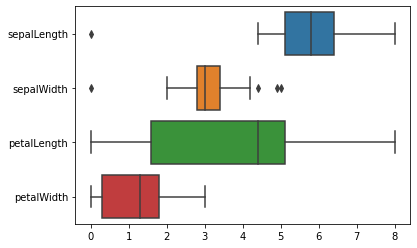

In [48]:
ax = sns.boxplot(data=df, orient="h") 

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [68]:
label_values=np.zeros(df.shape[0]) ## creamos el vector columna cero== fuera de rango

In [71]:
for i in range(df.shape[0]):
        if 7.0 >=df.iloc[i]['sepalLength']>= 4.0 and 4.5 >=df.iloc[i]['sepalWidth']>= 2.0 and 7.0 >=df.iloc[i]['petalLength']>= 1.0 and 2.5 >=df.iloc[i]['petalWidth']>= 0.1:
            label_values[i]=1 ## marcamos con 1 si esta dentro del rango


In [93]:
df=df.assign(label=label_values) ## añadimos la columna label

4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

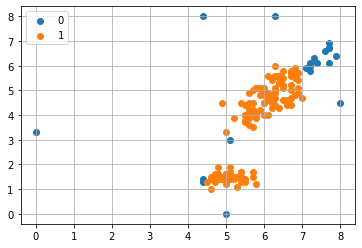

In [105]:
fig, ax = plt.subplots()
for color in [0,1]: ##para cada label
    x=df.loc[df["label"]==color]["sepalLength"] ## extrae el data frame con ese label y luego la columna deseada
    y=df.loc[df["label"]==color]["petalLength"]
    ax.scatter(x, y, label=color)

ax.legend()
ax.grid(True)

plt.show()

Conclusión: hay más datos válidos en el rango que fuera de este, parece haber dos cluster, uno lineal.

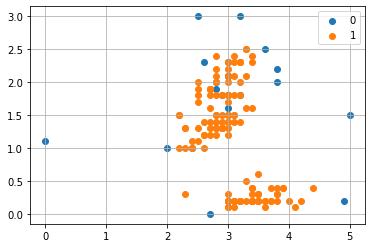

In [102]:
fig, ax = plt.subplots()
for color in [0,1]:
    x=df.loc[df["label"]==color]["sepalWidth"]
    y=df.loc[df["label"]==color]["petalWidth"]
    ax.scatter(x, y, label=color)

ax.legend()
ax.grid(True)

plt.show()

Conslusión: hay más datos válidos en el rango que fuera de este, se observan dos cluster

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

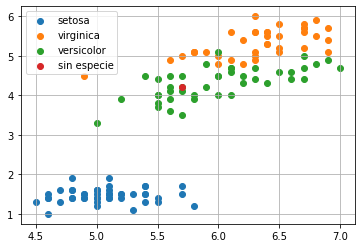

In [111]:
df_valido= df.loc[df["label"]==1] ## restringimos el data frame a los validos
fig, ax = plt.subplots()
for color in df["species"].unique():
    x=df_valido.loc[df["species"]==color]["sepalLength"] ## extrae el data frame con ese label y luego la columna deseada
    y=df_valido.loc[df["species"]==color]["petalLength"]
    ax.scatter(x, y, label=color)

ax.legend()
ax.grid(True)

plt.show()